# Breast Cancer Wisconsin (Diagnostic) Using Machine Learning

#### Loading Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, f1_score

#### Load the dataset

In [2]:
df = pd.read_csv('csv_files/data.csv')

#### Extract the first five data

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Total Number of Rows and Columns

In [4]:
print('Total Number of Rows: {}'.format(df.shape[0]))
print('Total Number of Columns: {}'.format(df.shape[1]))

Total Number of Rows: 569
Total Number of Columns: 33


#### Dataset Information and its Datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Data Cleaning
* Drop the id and Unnamed columns

In [6]:
df.drop(columns= ['id', 'Unnamed: 32'], axis= 1, inplace= True)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Statistical Summary

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


#### Check for missing values

In [9]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### Check for duplicate values

In [10]:
df[df.duplicated()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


#### Data Visualization of the dataset

In [11]:
df.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

Text(0.5, 0, 'Diagnosis')

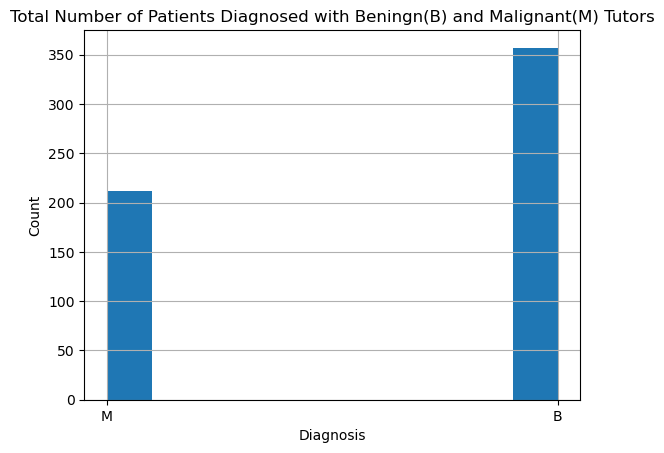

In [12]:
df['diagnosis'].hist()
plt.title('Total Number of Patients Diagnosed with Beningn(B) and Malignant(M) Tutors')
plt.ylabel('Count')
plt.xlabel('Diagnosis')

#### Outlier: Plotting Boxplot for the Numerical Features 

In [13]:
num_feature_lst = [feature for feature in df.columns if df.dtypes[feature] == 'float64']

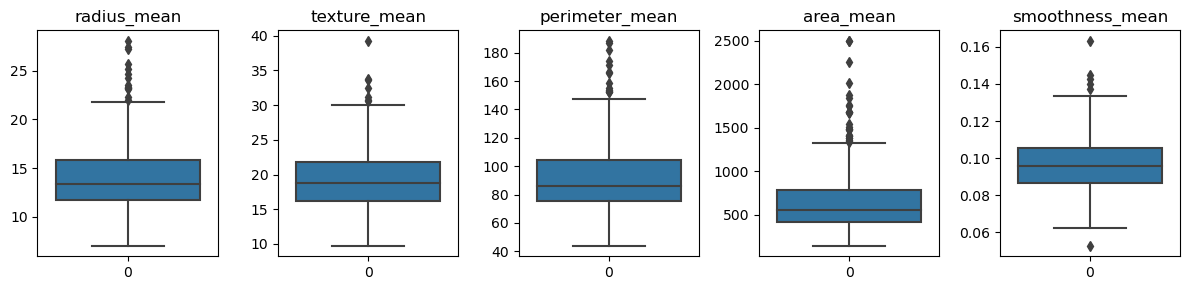

In [14]:
fig, axes = plt.subplots(ncols=5, figsize = (12, 3))
for column, axis in zip(num_feature_lst[:5], axes):
    sns.boxplot(data = df[column], ax = axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

#### Replace Outlier with 95 percentile and 5 percentile

In [15]:
p05 = df['compactness_se'].quantile(.05)
p05

0.0078922

In [16]:
p95 = df['compactness_se'].quantile(.95)
p95

0.06057800000000001

In [17]:
df['compactness_se'].clip(p05, p95, inplace=True)

<Axes: >

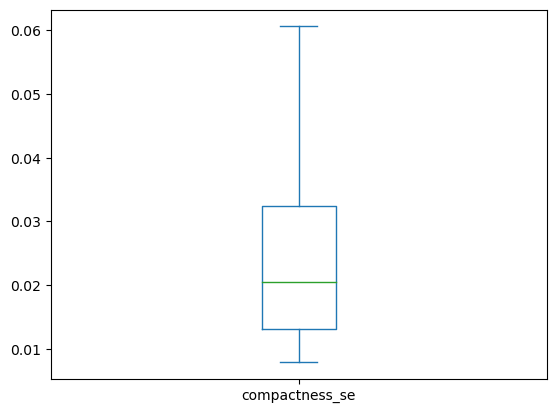

In [18]:
df['compactness_se'].plot(kind='box')

#### List for Numerical Columns

In [19]:
n_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#### Replace Outliers with 5th and 95th Percentiles

In [20]:
df[n_col] = df[n_col].apply(lambda x: x.clip(*x.quantile([.05, .95])))

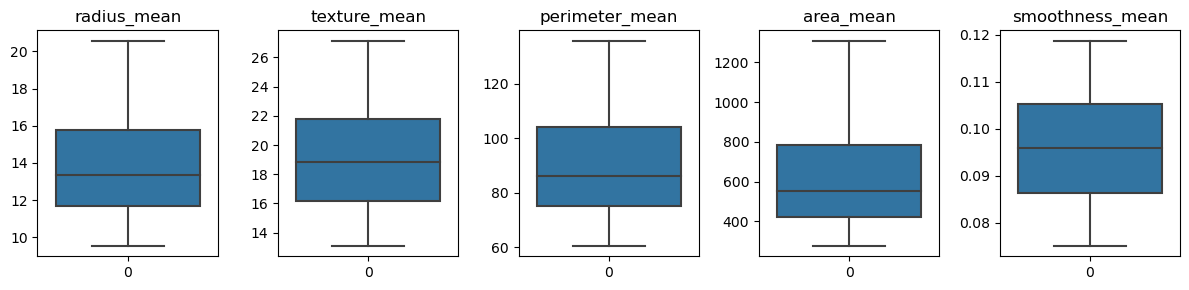

In [21]:
fig, axes = plt.subplots(ncols=5, figsize = (12, 3))
for column, axis in zip(num_feature_lst[:5], axes):
    sns.boxplot(data = df[column], ax = axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

#### Convert Categorical variable to Numeric variables

Making instance of labelencoder()

In [22]:
le = LabelEncoder()
encoded = le.fit_transform(df['diagnosis'])
print(encoded)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

Removing the original column 'diagnosis' from df

In [23]:
df.drop('diagnosis', axis=1, inplace=True)

Appending the array to our dataFrame and load the new dataset

In [24]:
df['diagnosis'] = encoded
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,13.088,122.80,1001.0,0.11840,0.20870,0.24302,0.12574,0.23072,0.07609,...,17.33,171.64,2009.6,0.16220,0.56412,0.68238,0.23692,0.40616,0.11890,1
1,20.57,17.770,132.90,1309.8,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902,1
2,19.69,21.250,130.00,1203.0,0.10960,0.15990,0.19740,0.12574,0.20690,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.23692,0.36130,0.08758,1
3,11.42,20.380,77.58,386.1,0.11878,0.20870,0.24140,0.10520,0.23072,0.07609,...,26.50,98.87,567.7,0.17184,0.56412,0.68238,0.23692,0.40616,0.11952,1
4,20.29,14.340,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.18090,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678,1


#### Extract the feature variables

In [25]:
X = df.drop('diagnosis', axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,13.088,122.80,1001.0,0.11840,0.20870,0.24302,0.12574,0.23072,0.07609,...,25.38,17.33,171.64,2009.6,0.16220,0.56412,0.68238,0.23692,0.40616,0.11890
1,20.57,17.770,132.90,1309.8,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902
2,19.69,21.250,130.00,1203.0,0.10960,0.15990,0.19740,0.12574,0.20690,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.23692,0.36130,0.08758
3,11.42,20.380,77.58,386.1,0.11878,0.20870,0.24140,0.10520,0.23072,0.07609,...,14.91,26.50,98.87,567.7,0.17184,0.56412,0.68238,0.23692,0.40616,0.11952
4,20.29,14.340,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.18090,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678


In [26]:
X.shape

(569, 30)

#### Extract the target variable

In [27]:
y = df['diagnosis']
y.tail(10)

559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, dtype: int32

In [28]:
y.shape

(569,)

#### Split data into training and test sets

In [29]:
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print('\n', 'Total Row and Column:', X.shape,'\n', 'Total Number of Training Set:', X_train.shape,'\n', 'Total Number of Test Set:', X_test.shape)


 Total Row and Column: (569, 30) 
 Total Number of Training Set: (455, 30) 
 Total Number of Test Set: (114, 30)


#### Converting Target Variable into Numerical Variable

In [31]:
#y = df['diagnosis'].apply(lambda x : 1 if x == 'M' else 0)
#y.value_counts()

* Diagnosed with M: 1
* Diagnosed with B: 0

In [32]:
y.tail()

564    1
565    1
566    1
567    1
568    0
Name: diagnosis, dtype: int32

In [33]:
df.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
564,20.5760,22.39,135.820,1309.80,0.111000,0.11590,0.243020,0.125740,0.17260,0.05623,...,26.40,166.100,2009.60,0.141000,0.211300,0.41070,0.221600,0.21270,0.07115,1
565,20.1300,27.15,131.200,1261.00,0.097800,0.10340,0.144000,0.097910,0.17520,0.05533,...,36.30,155.000,1731.00,0.116600,0.192200,0.32150,0.162800,0.25720,0.06637,1
566,16.6000,27.15,108.300,858.10,0.084550,0.10230,0.092510,0.053020,0.15900,0.05648,...,34.12,126.700,1124.00,0.113900,0.309400,0.34030,0.141800,0.22180,0.07820,1
567,20.5760,27.15,135.820,1265.00,0.117800,0.20870,0.243020,0.125740,0.23072,0.07016,...,36.30,171.640,1821.00,0.165000,0.564120,0.68238,0.236920,0.40616,0.11952,1
568,9.5292,24.54,60.496,275.78,0.075042,0.04362,0.004983,0.005621,0.15870,0.05884,...,30.37,67.856,331.06,0.095734,0.071196,0.01836,0.024286,0.28710,0.07039,0


#### Feature Scaling

In [34]:
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

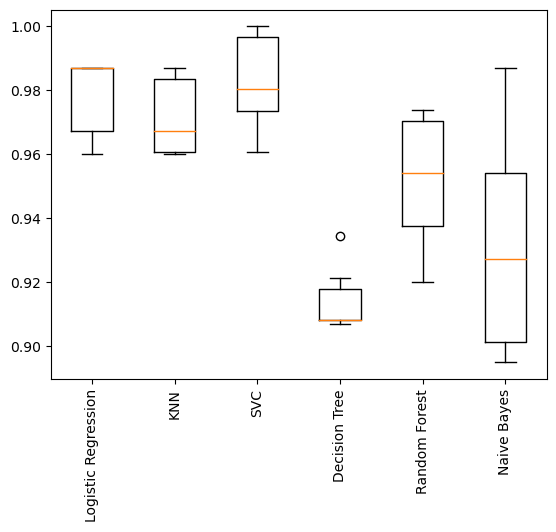

In [36]:
models= {'Logistic Regression': LogisticRegression(),
        'KNN': KNeighborsClassifier(),
        'SVC': SVC(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    cv_scores =  cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_scores)

plt.boxplot(results, labels= models.keys())
plt.xticks(rotation= 90)
plt.show()    

#### Evaluation of R Squared Accuracy on different models

In [37]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r_squared = r2_score(y_test, y_pred)
    print('{} Squared Error: {}'.format(name, r_squared))

Logistic Regression Squared Error: 0.9626596790042581
KNN Squared Error: 0.7759580740255486
SVC Squared Error: 0.8506387160170324
Decision Tree Squared Error: 0.7386177530298067
Random Forest Squared Error: 0.8506387160170324
Naive Bayes Squared Error: 0.8879790370127743


#### Evaluation of Root Mean Squared Error on different models

In [38]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r_squared = r2_score(y_test, y_pred)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    print('{} Test Set RMSE: {}'.format(name, test_rmse))

Logistic Regression Test Set RMSE: 0.0936585811581694
KNN Test Set RMSE: 0.22941573387056177
SVC Test Set RMSE: 0.1873171623163388
Decision Tree Test Set RMSE: 0.22941573387056177
Random Forest Test Set RMSE: 0.1873171623163388
Naive Bayes Test Set RMSE: 0.16222142113076254


#### Evaluation of Cross Validation on different models

In [39]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv= 5)
    cv_score = np.abs(np.mean(cv_score))
    print('{} Cross Validation Score: {}'.format(name, cv_score))

C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Logistic Regression Cross Validation Score: 0.06149666200900481


C:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\utils\_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    

KNN Cross Validation Score: nan
SVC Cross Validation Score: 0.08430367955286444
Decision Tree Cross Validation Score: 0.07557832634684056
Random Forest Cross Validation Score: 0.047414997671169065
Naive Bayes Cross Validation Score: 0.061512187548517304


In [53]:
models = {'Log reg': LogisticRegression(), 'KNN': KNeighborsClassifier(), 'SVC': SVC(), 'Decision tree': DecisionTreeClassifier(),
         'Random forest': RandomForestClassifier(), 'Naive': GaussianNB()}

#### Evaluation of Accuracy of the Models

In [57]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print('{} Accuracy Score: {}'.format(name, accuracy))

Log reg Accuracy Score: 0.9912280701754386
KNN Accuracy Score: 0.9473684210526315
SVC Accuracy Score: 0.9649122807017544
Decision tree Accuracy Score: 0.9298245614035088
Random forest Accuracy Score: 0.9649122807017544
Naive Accuracy Score: 0.9736842105263158


In [ ]:
y_pred_test = logreg.predict(X_test)

Log reg Results:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

KNN Results:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

SVC Results:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.

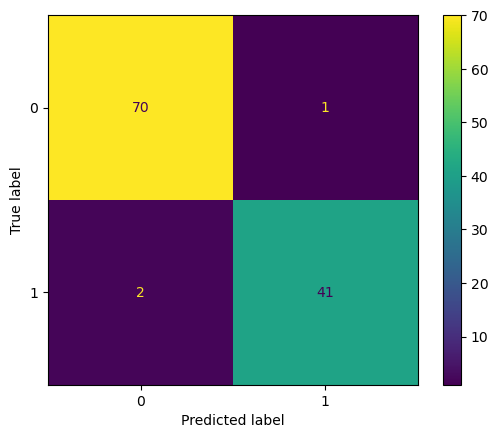

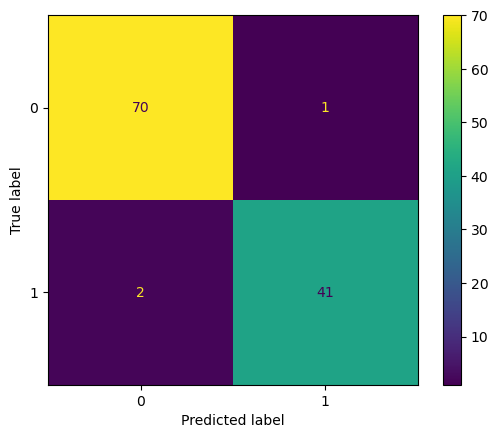

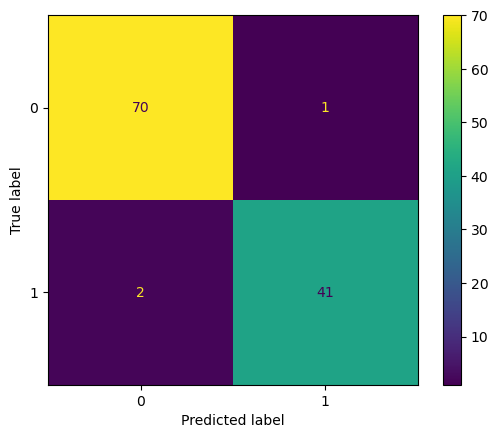

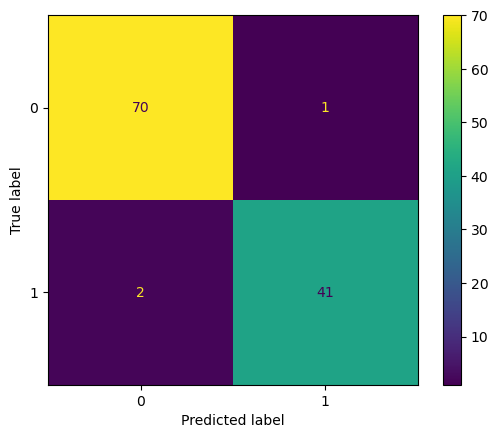

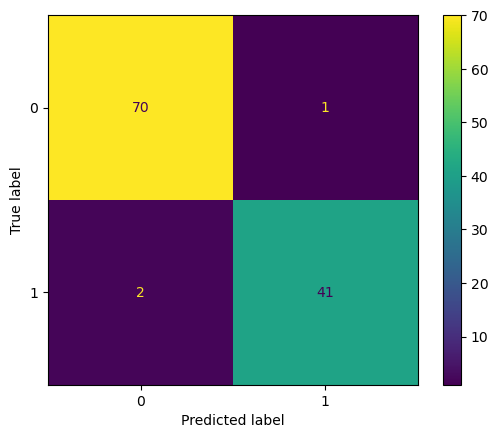

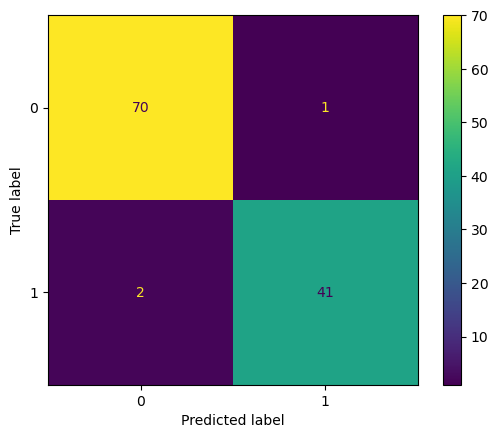

In [64]:
for model, predict in models.items():
    conf_matrix = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot();
    print('=======================================================')
    print('{} Results:\n{}'.format(model, classification_report(y_test, y_pred)))